## Haberman's Survival : Exploratory Data Analysis

**Attribute Information**

Age of patient at the time of operation (numerical);

Patient's year of operation (year - 1900, numerical);

Number of positive axillary nodes detected (numerical);

Survival status (class attribute)   
* 1 = the patient survived 5 years or longer 
* 2 = the patient died within 5 years

In [114]:
import warnings 

import pandas as pd                  # powerful libraries to process tabular data
import seaborn as sns                # For statistical graphics; build on the top of matplotlib and integrates closely with pandas data structure.
import matplotlib.pyplot as plt
import numpy as np

warnings.filterwarnings("ignore")   # to suppress the warnings 
#Loading haberman file into pandas dataFrame
haberman=pd.read_csv("haberman.csv")


In [100]:
# Finding how many data points and features does haberman file has? (rows and columns) 
print(haberman.shape)

# There are total 306 data points and 4 columns 

(306, 4)


In [101]:
# Finding column names in the database?
print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [102]:
# Finding the survival status of patients
haberman["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

**Observation**

We have two classes:

1. CLASS 1 represents patient survived 5 years or longer and it has 225 data points
2. CLASS 2 represents patient died within 5 years and it has 81 data points


It is like an IMBALANCED DATA SETS.
[Imbalanced data sets are a special case for classification problem where the class distribution is not uniform among the classes.]

In [103]:
# Finding how many operations were carried in a particular year
haberman["year"].value_counts()

58    36
64    31
63    30
66    28
65    28
60    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: year, dtype: int64

**OBSERVATION**

* Operations carries out in each year.
* Maximum operations were carried out in year 58 which is 36

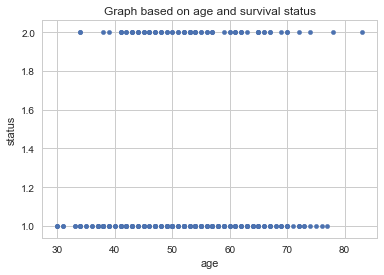

In [104]:
# 2 D scatter point
#Survival status of a person based on its age ( X = AGE and Y = STATUS)
haberman.plot(kind='scatter' , x='age' , y='status');

plt.title("Graph based on age and survival status");
plt.show()



**OBSERVATION**

Here we get an idea about distribution of class , the status depicts good results as maximum people [between age 30 and 75] survived for more than 5 years

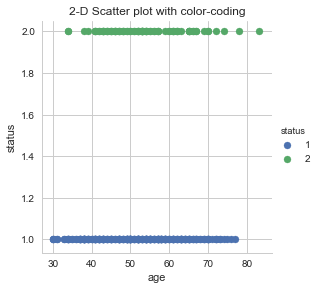

In [105]:
# 2-D Scatter plot with color-coding ; STATUS
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue= "status", size=4).map(plt.scatter, "age", "status").add_legend();\
plt.title("2-D Scatter plot with color-coding");
plt.show();

**OBSERVATION**

Using color coding:

1. It is much easier to differentiate the status, and we can much clearly differentiate 

    * the survival status is extremely higher from age group  <=30 and >= 55; 
    * the survival status is started decreasing from age group <55 and >75
    * whereas survival status is extremely lower from the age group <= 75

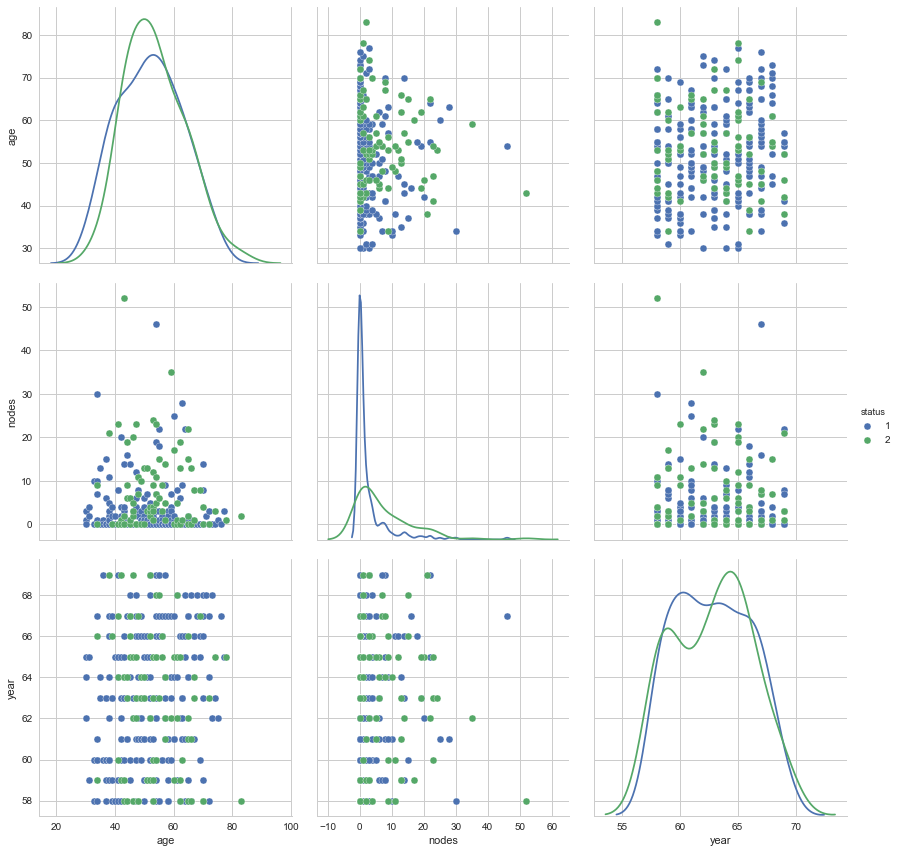

In [139]:
#Using Pair-Plot , 3x3 grid
sns.pairplot(haberman, vars = ["age", "nodes", "year"], hue = "status", diag_kind = 'kde', size = 4);

#

**OBSERVATION**

* Patients with lower age group less than 40 and nodes less than 8 are having excellent survival status i.e. 1
* Whereas, Patients with higher age group greater than 42 and nodes greater than 4 are having lower survival status i.e. 2
* Patients of age greater than 40 and less than 70 had higher number of nodes.

Overall we cannot anaylise the exact distribution pattern as the data is scattered.



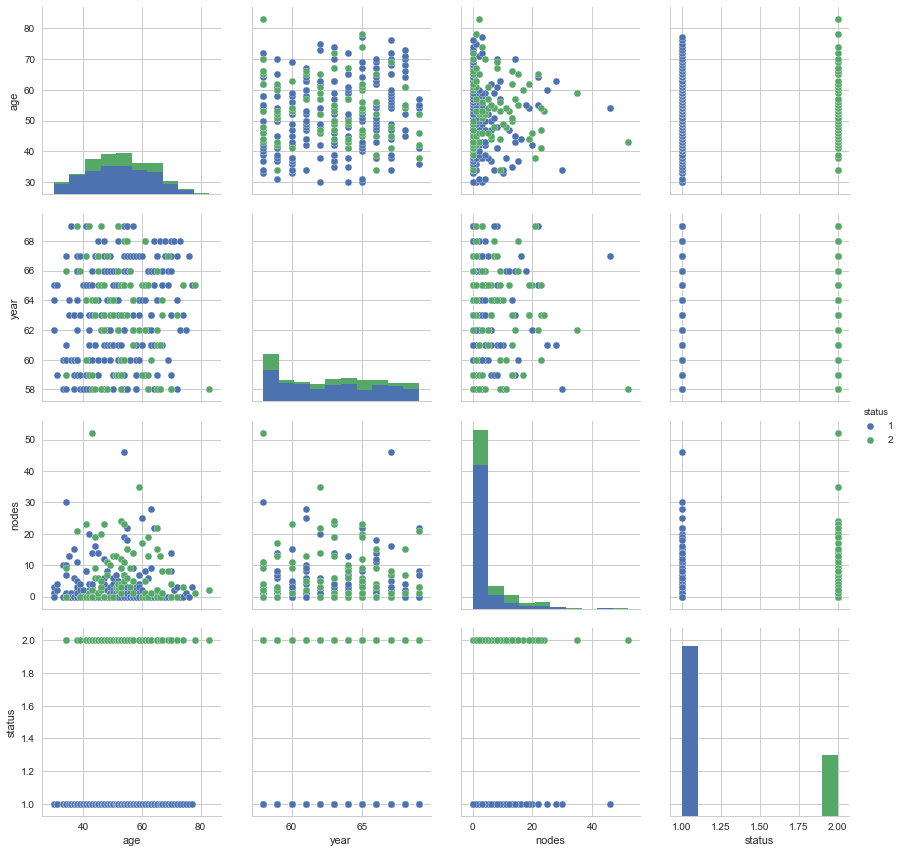

In [137]:
#Using Pair-Plot (Old one) 4x4 grid
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status", size=3);


plt.show();

**OBSERVATION**

By observing the above plots we found out that:
1. All the graphs shows mixed results, no clear observations can be made
2. We can see that higher density of nodes between 0 to 20 are common among the age groups and year of operations.

The above graphs could not help us to easily classify the data set so we are try building more complex features using Histogram, PDF, CDF

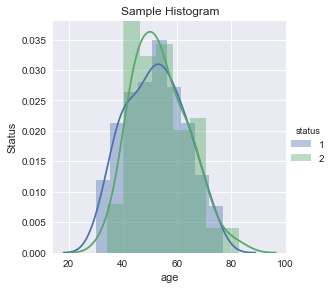

In [116]:
sns.FacetGrid(haberman, hue="status", size=4) .map(sns.distplot, "age") .add_legend();
plt.title("Sample Histogram");
plt.ylabel("Status");
plt.show();


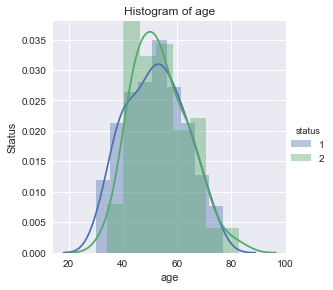

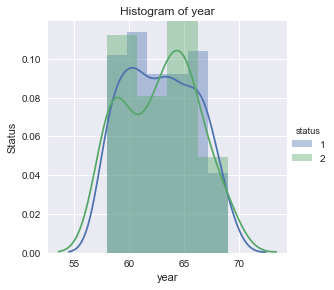

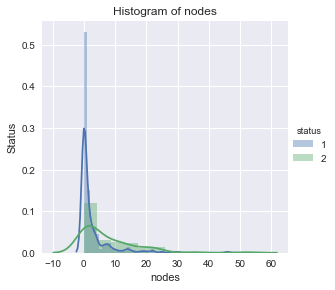

In [117]:
#Histograms of all the features
sns.set()
for feature in list(haberman.columns)[:-1]:
    sns.FacetGrid(haberman, hue="status", size=4).map(sns.distplot, feature).add_legend();
    plt.title("Histogram of "+feature);
    plt.ylabel("Status");
    plt.show();

**OBSERVATION**

1. Deaths of patients treated around year 1958 and around 1965 were found to be more as compared to deaths of patients in other years.
2. Patients who survived more than 5 years had nodes densed from 0-5 while patients who died within 5 years had nodes densed from 0-20.

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


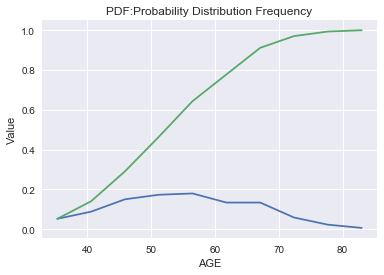

In [119]:
#plotting pdf and cdf corresponding to age
counts,bin_edges=np.histogram(haberman["age"],bins=10,density =True)
pdf=counts/sum(counts)

print(pdf);
print(bin_edges);
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.title("PDF:Probability Distribution Frequency");
plt.ylabel("Value");
plt.xlabel("AGE");
plt.show()

## Mean, Variance and Std-dev

In [109]:
print(haberman.describe())

              age        year       nodes      status
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000


**OBSERVATION**

The above data describe the following:
1. The age of the patients vary from 30(min) to 83(max) with the median age being 52(50%).
2. The survival status is higher between age 30 and 52 whereas the survival status is declining after age 60 
3. The nodes vary from 0 to 52. But 25% of patients having 0 nodes, 50% of patients having less than or equal to 1 nodes and 75% of the patients having less than or equal to 4  nodes.

In [110]:
One=haberman.loc[haberman["status"]==1]
Two=haberman[haberman["status"]==2]

print("Patients who survived 5 years or more :")
print(One.describe())
print("\n****************************************************************************\n")
print("Patients who died within 5 years :")
print(Two.describe())

Patients who survived 5 years or more :
              age        year       nodes  status
count  225.000000  225.000000  225.000000   225.0
mean    52.017778   62.862222    2.791111     1.0
std     11.012154    3.222915    5.870318     0.0
min     30.000000   58.000000    0.000000     1.0
25%     43.000000   60.000000    0.000000     1.0
50%     52.000000   63.000000    0.000000     1.0
75%     60.000000   66.000000    3.000000     1.0
max     77.000000   69.000000   46.000000     1.0

****************************************************************************

Patients who died within 5 years :
             age       year      nodes  status
count  81.000000  81.000000  81.000000    81.0
mean   53.679012  62.827160   7.456790     2.0
std    10.167137   3.342118   9.185654     0.0
min    34.000000  58.000000   0.000000     2.0
25%    46.000000  59.000000   1.000000     2.0
50%    53.000000  63.000000   4.000000     2.0
75%    61.000000  65.000000  11.000000     2.0
max    83.000000  69

**OBSERVATION**

**Patients who survived more than 5 years:**

* The mean of nodes is 2.79
* The median of nodes is 0 which implies 50% of patients had 0  nodes.
* Even though max nodes is 46, 75% of patients had less than equal to 3 nodes.


**Patients who died within 5 years:**

* The mean of nodes is 7.45
* The median of nodes is 4 which implies 50% of patients had less than or equal to 4 nodes.
* Max nodes is 52 and 75% of patients had less than equal to 11 nodes.

In [120]:
#Mean, Variance, Std-deviation, Medians, Quantiles
print("Means:")
print(np.mean(haberman))
print("________________________________________")

print("\nStd-dev:");
print(np.std(haberman))
print("________________________________________")

print("\nMedians:")
print(np.median(haberman))
print("________________________________________")

print("\nQuantiles:")
print(np.percentile(haberman,np.arange(0, 100, 25)))

Means:
age       52.457516
year      62.852941
nodes      4.026144
status     1.264706
dtype: float64
________________________________________

Std-dev:
age       10.785785
year       3.244091
nodes      7.177896
status     0.441176
dtype: float64
________________________________________

Medians:
30.5
________________________________________

Quantiles:
[ 0.   1.  30.5 60. ]


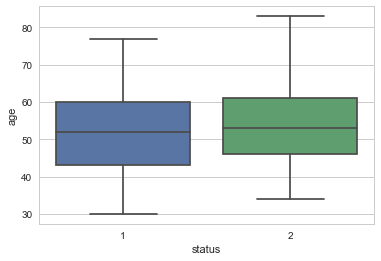

In [157]:
#boxplot corresponding to age and status

sns.boxplot(x="status",y="age",data=haberman);
plt.show();



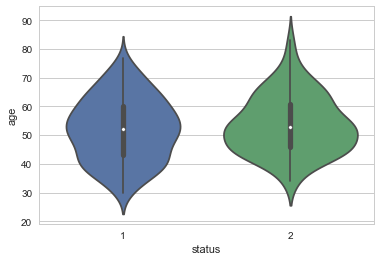

In [158]:
# A violin plot combines the benefits of the previous two plots and simplifies them
sns.violinplot(x="status", y="age", data=haberman, height=8);
plt.show();


**Final Conclusion**
1. Dataset is imbalanced with lower datapoints and missing values . We don't have clear observation for the patients who died within 5 years
2. Between 58 and 65 year ,we found that survival status was low as compared to other years.
3. Patients with lower age group less than 40 and nodes less than 8 are having excellent survival status i.e. 1
    * Whereas, Patients with higher age group greater than 42 and nodes greater than 4 are having lower survival status i.e. 2
    * Patients of age greater than 40 and less than 70 had higher number of nodes.
4. Every comparison is unique in itself as data is scattered and is not lineraly separable , so single conclusion can't be made.

NOTE-Observation have been added for every data that has been analyzed based upon certain set of criteria.